- In this notebook we explore the eco-friendliness of products in terms of labels ! We will see there are many different labels and we will try to wrangle our way around those labels and see if we can reach any interesting conclusions

In [1]:
import pandas as pd
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt

In [2]:
DATAPATH = 'data/'

In [4]:
data = pd.read_csv(DATAPATH+'labels.csv',delimiter=',',low_memory=False)
data.set_index('code',inplace=True)
data.shape

(99655, 3)

In [3]:
data_total = pd.read_csv(DATAPATH+'cleaned_unique_index.csv',delimiter=',',low_memory=False)
data_total.set_index('code',inplace=True)

In [5]:
data.head()

,labels,labels_tags,labels_en
code,,,
0000000020114,Fabriqué en France,en:made-in-france,Made in France
0000000274722,"Viande Française,Fabriqué en France","fr:viande-francaise,en:made-in-france","fr:Viande Française,Made in France"
0000003444009,Contient des OGM,en:contains-gmos,Contains GMOs
0000005200016,AB,"en:organic,en:eu-organic,fr:ab-agriculture-bio...","Organic,EU Organic,fr:AB Agriculture Biologique"
0000007020254,"Kascher,Contient des OGM","en:kosher,en:contains-gmos","Kosher,Contains GMOs"


In [28]:
# We do a 'flatmap' trick...
label_flatted = data["labels_en"].str.split(',').apply(pd.Series).unstack().dropna().to_frame()
label_flatted.columns = ["labels_en"]
label_flatted = label_flatted.reset_index().set_index("code")
label_flatted = label_flatted[["labels_en"]]
label_flatted.head()

,labels_en
code,
0000000020114,Made in France
0000000274722,fr:Viande Française
0000003444009,Contains GMOs
0000005200016,Organic
0000007020254,Kosher


In [30]:
organic = label_flatted[label_flatted["labels_en"].str.contains("Organic")]
organic = organic[~organic.index.duplicated()] ## We don't want to many. 


In [31]:
cnt_organic = organic.shape[0]
total_cnt = data_total.shape[0]
percentage = cnt_organic / total_cnt
print("There are %d articles with label organic" % cnt_organic)
print("This represents %f %% of articles " % percentage)

There are 37395 articles with label organic
This represents 0.056175 % of articles 


In [39]:
bio = label_flatted[label_flatted["labels_en"].str.contains("Bio")]
bio = bio[~bio.index.duplicated()] ## We don't want to many. 
bio.head()

,labels_en
code,
0018627740001,Bio
0221109418736,it:Bio
02516101,fr:Biogroupe
0621456277183,fr:Biologique-avec-legumes
11044204,fr:Bio7


In [33]:
cnt_organic = organic.shape[0]
cnt_bio = bio.shape[0]
total_cnt = data_total.shape[0]
percentage_organic = cnt_organic / total_cnt
percentage_bio = cnt_bio / total_cnt
print("There are %d articles with label organic" % cnt_organic)
print("This represents %f %% of articles " % percentage_organic)
print("There are %d articles with label bio" % cnt_bio)
print("This represents %f %% of articles " % percentage_bio)

There are 37395 articles with label organic
This represents 0.056175 % of articles 
There are 13886 articles with label bio
This represents 0.020859 % of articles 


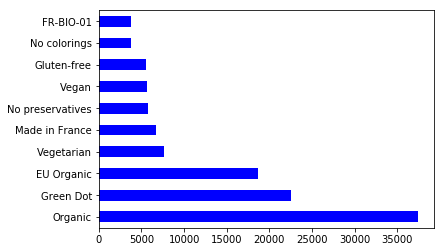

In [46]:
label_flatted[np.logical_not(label_flatted["labels_en"].str.startswith("fr:"))]["labels_en"].value_counts().nlargest(10).plot.barh(color='b')
plt.savefig("img/labels/count_by_label.png",bbox_inches='tight')
plt.show()

- We can see that the most popular label is organic, there are also a lot of articles having the green dot label which is depicted below for people who do not know what it is. 
- In order here are the most popular labels, unfortunately having an organic label is not a real label. It is a wide concept. Agriculture biologique is a french label. 
<img src="img/eu_organic.jpg" alt="EU Organic">
<img src="img/green_dot.svg" alt="Green Dot">
<img src="img/agri_bio.png" alt="Agriculture biologique">


- We now focus on those three mentionned label to see where we can find them most. 


In [36]:
top_4 = label_flatted["labels_en"].value_counts().nlargest(4)
top_4 = list(top_4.index)
top_4_articles = label_flatted[label_flatted["labels_en"].apply(lambda r : r in top_4)]

In [37]:
top_4_all = top_4_articles.join(data_total["origins_tags"], how="inner",lsuffix="l",rsuffix="r").dropna(subset=["origins_tags"])
top_4_all.head()

,labels_en,origins_tags
code,,
00028202,Green Dot,royaume-uni
00035460,Green Dot,vietnam
00050319,Organic,france
00050319,EU Organic,france
00050319,fr:AB Agriculture Biologique,france


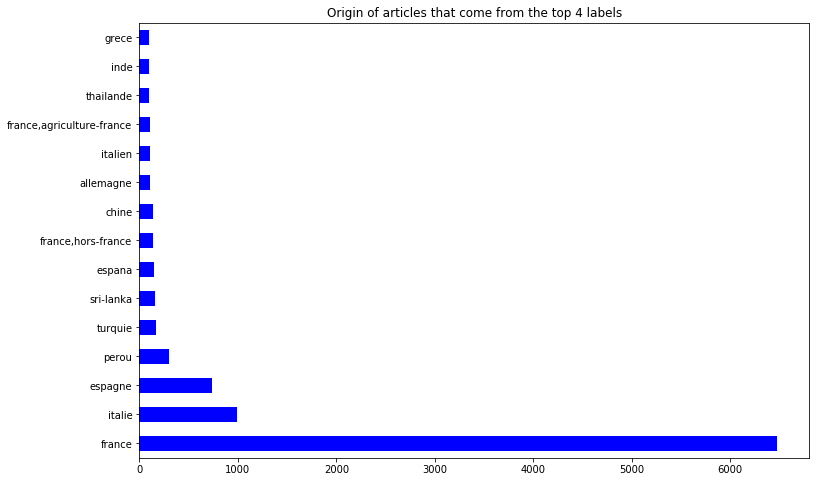

In [38]:

top_4_all[np.logical_not(np.logical_or(top_4_all["origins_tags"].str.contains("eu"),top_4_all["origins_tags"].str.contains("ue")))]["origins_tags"].value_counts().nlargest(15).plot.barh(figsize=(12,8),title="Origin of articles that come from the top 4 labels",color='b')
plt.savefig("img/labels/origin_top_4_labels",bboxes_inches='tight')
plt.show()

- We can see that most products come from France however there are a number of articles that come way further than france, it will be interesting to see to study where they are being sold, but this will be done in depth in an other study. 